# Time series analysis attempt

In [199]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [369]:
%%time
data = pd.read_csv('data/Traffic_Violations (6).csv', low_memory = False)

Wall time: 16.2 s


In [370]:
data.shape

(1618721, 43)

In [371]:
data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [372]:
data.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [373]:
%%time 
data['Date Of Stop'] = pd.to_datetime(data['Date Of Stop'])

Wall time: 2min 5s


In [374]:
data['Date Of Stop'].min(), data['Date Of Stop'].max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2019-12-09 00:00:00'))

In [375]:
cols = ['SeqID', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation']

data.drop(cols, axis = 1, inplace = True)

**Dropping all the columns we don't need**

In [376]:
data.shape

(1618721, 1)

In [377]:
data.head()

,Date Of Stop
0,2019-07-30
1,2019-07-07
2,2019-07-10
3,2019-08-15
4,2019-04-15


In [378]:
data = data.rename(columns = {'Date Of Stop': 'date'})

In [379]:
data.head()

,date
0,2019-07-30
1,2019-07-07
2,2019-07-10
3,2019-08-15
4,2019-04-15


In [380]:
data['year_month'] = ""

In [381]:
data['year_month'] = data['date'].dt.strftime('%Y-%m')

In [382]:
data.head()

,date,year_month
0,2019-07-30,2019-07
1,2019-07-07,2019-07
2,2019-07-10,2019-07
3,2019-08-15,2019-08
4,2019-04-15,2019-04


In [383]:
data = data.set_index("date").groupby(pd.Grouper(freq='M')).count()

In [384]:
data.head()

,year_month
date,
2012-01-31,10253
2012-02-29,10342
2012-03-31,11624
2012-04-30,13174
2012-05-31,17397


In [385]:
# data['year_month'] = pd.to_datetime(data['year_month'])

In [386]:
data = data['year_month'].to_frame()

In [387]:
data = data.rename(columns = {'year_month' : 'violations'})

In [388]:
data.head()

,violations
date,
2012-01-31,10253
2012-02-29,10342
2012-03-31,11624
2012-04-30,13174
2012-05-31,17397


In [389]:
data = data.sort_index()

In [390]:
# for years 2016 - 2018 to match our crashes data
subset = data[48:84]

In [391]:
data['violations'].sum()

1618721

In [392]:
subset

,violations
date,
2016-01-31,16675
2016-02-29,19833
2016-03-31,22521
2016-04-30,20999
2016-05-31,18737
2016-06-30,20057
2016-07-31,17256
2016-08-31,17699
2016-09-30,16364


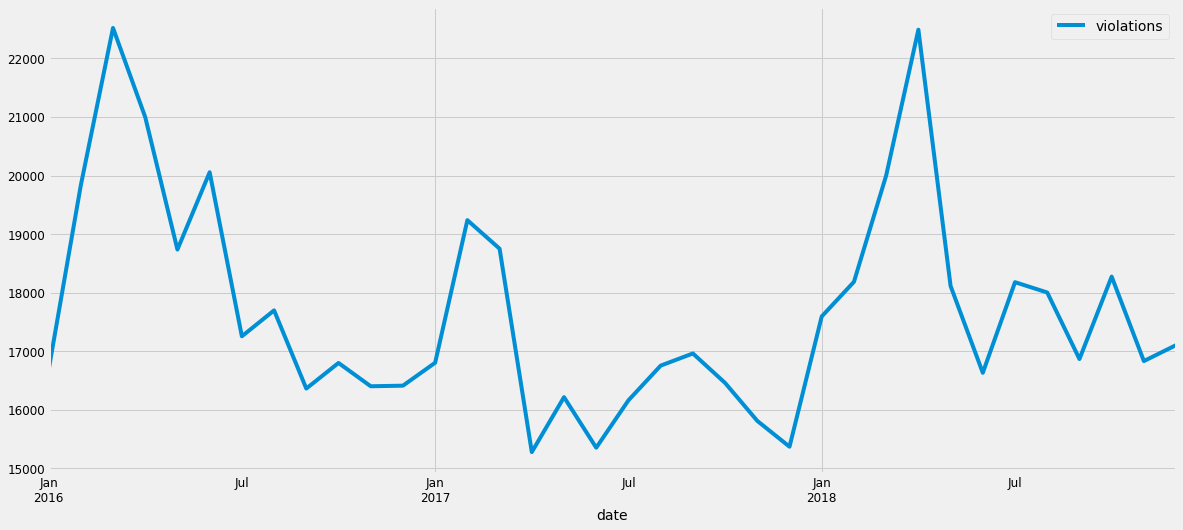

In [393]:
subset.plot()

In [394]:
subset.head()

,violations
date,
2016-01-31,16675
2016-02-29,19833
2016-03-31,22521
2016-04-30,20999
2016-05-31,18737


In [395]:
data.violations.sum()

1618721

**We have too many data points so we get what looks like white noise**  
**We can work around this with using the mean**

In [396]:
y = subset['violations']

In [397]:
# y = data['violations'].resample('MS').mean()

In [398]:
y['2018']

date
2018-01-31    17595
2018-02-28    18186
2018-03-31    20001
2018-04-30    22491
2018-05-31    18115
2018-06-30    16633
2018-07-31    18180
2018-08-31    18004
2018-09-30    16868
2018-10-31    18275
2018-11-30    16833
2018-12-31    17106
Freq: M, Name: violations, dtype: int64

**This is much easier to work with and a better time set**

# Time Series

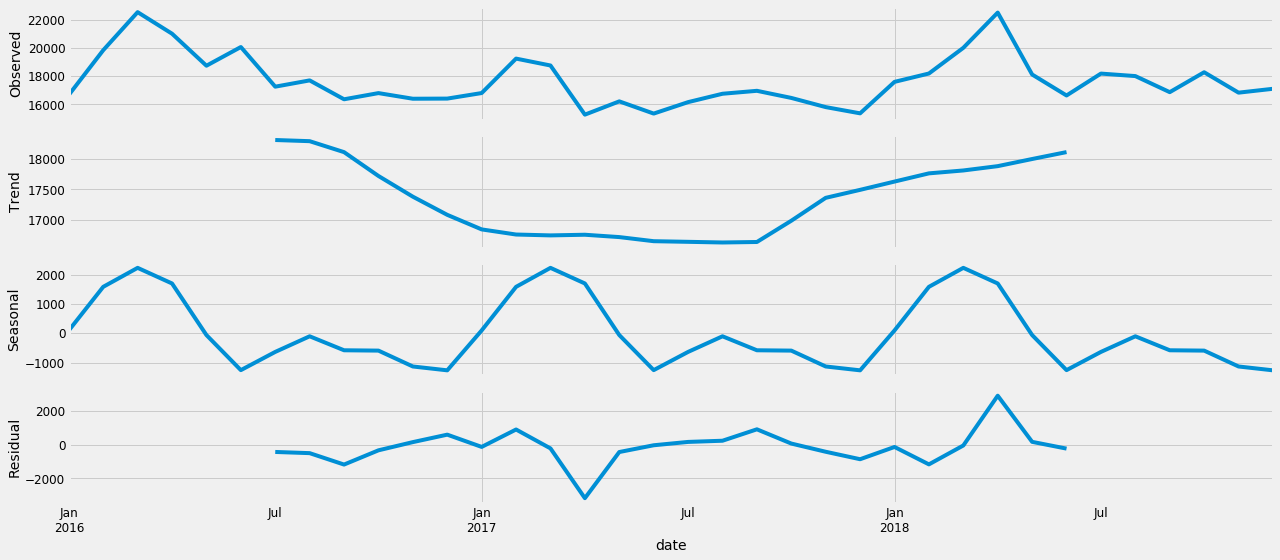

In [399]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [400]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [401]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1855      0.881     -0.211      0.833      -1.911       1.540
ma.L1         -1.0014      0.467     -2.144      0.032      -1.917      -0.086
ar.S.L12      -0.4125      0.069     -5.970      0.000      -0.548      -0.277
sigma2      2.008e+06   2.32e-07   8.65e+12      0.000    2.01e+06    2.01e+06


In [402]:
###### results.plot_diagnostics(figsize=(16, 8))
plt.show()

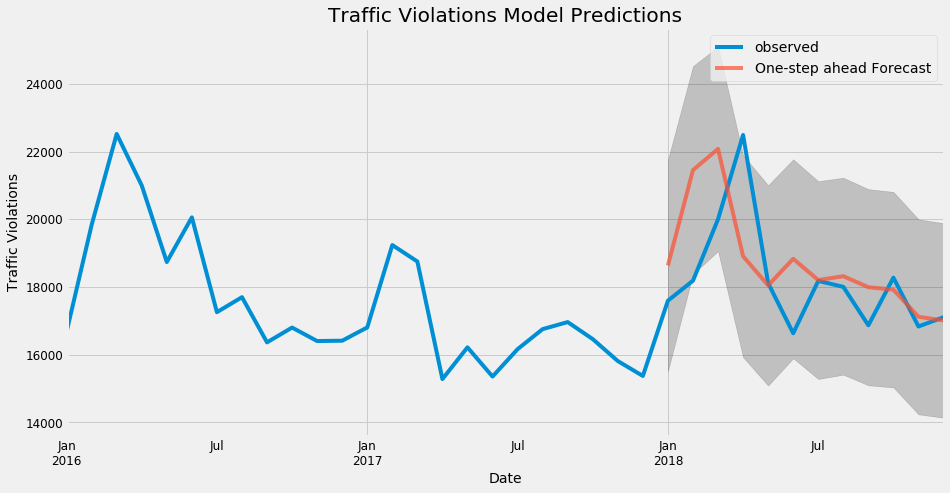

In [404]:
pred = results.get_prediction(start=24, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Violations')
plt.title('Traffic Violations Model Predictions')
plt.legend()
plt.show()

In [405]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2945161.62


In [406]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1716.15


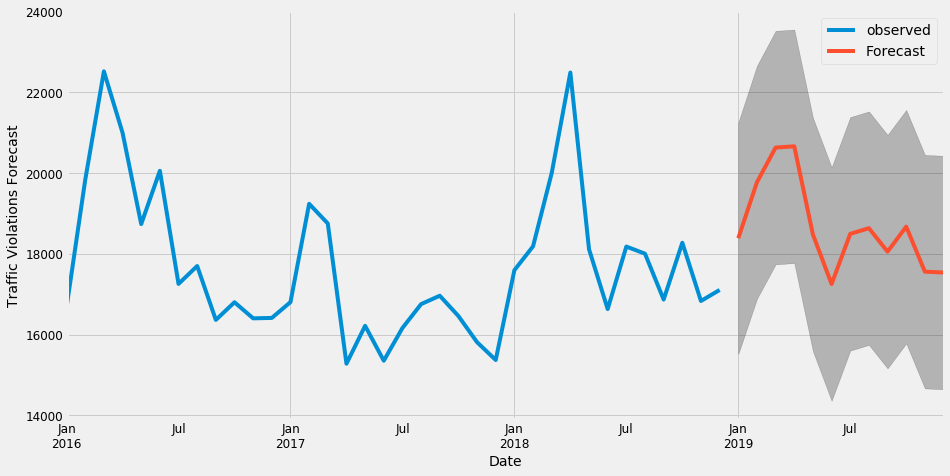

In [409]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Violations Forecast')
plt.legend()
plt.show()

# Time Series Normalized

In [410]:
from sklearn import preprocessing

In [411]:
# Create x, where x the 'scores' column's values as floats
x = subset[['violations']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

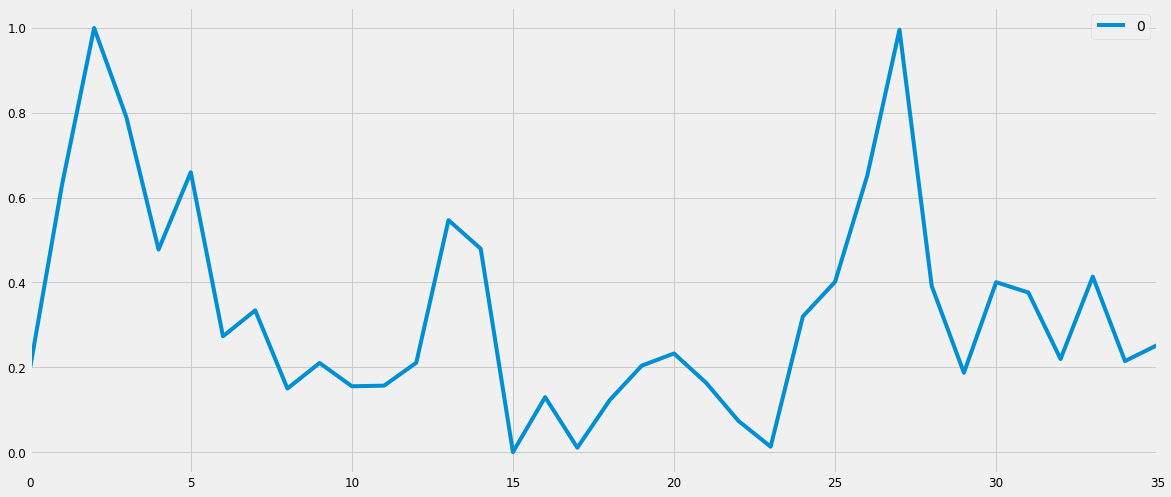

In [412]:
df_normalized.plot()

In [413]:
df_normalized.to_csv('data/traffic_violations_normalized.csv')

In [414]:
df_normalized.head()

,0
0,0.192764
1,0.628832
2,1.000000
3,0.789837
4,0.477492


In [415]:
normalized=(subset-subset.min())/(subset.max()-subset.min())


# Time Series Normalized 

In [416]:
normalized.head()

,violations
date,
2016-01-31,0.192764
2016-02-29,0.628832
2016-03-31,1.000000
2016-04-30,0.789837
2016-05-31,0.477492


In [417]:
y = normalized['violations']

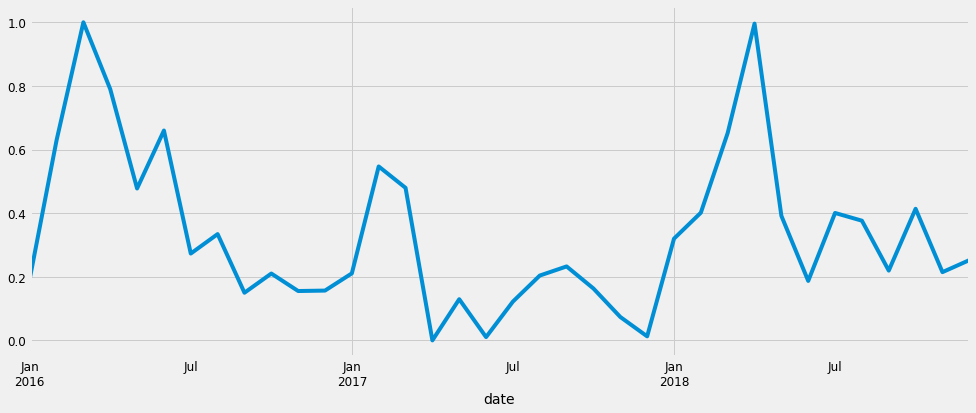

In [418]:
y.plot(figsize=(15, 6))
plt.show()

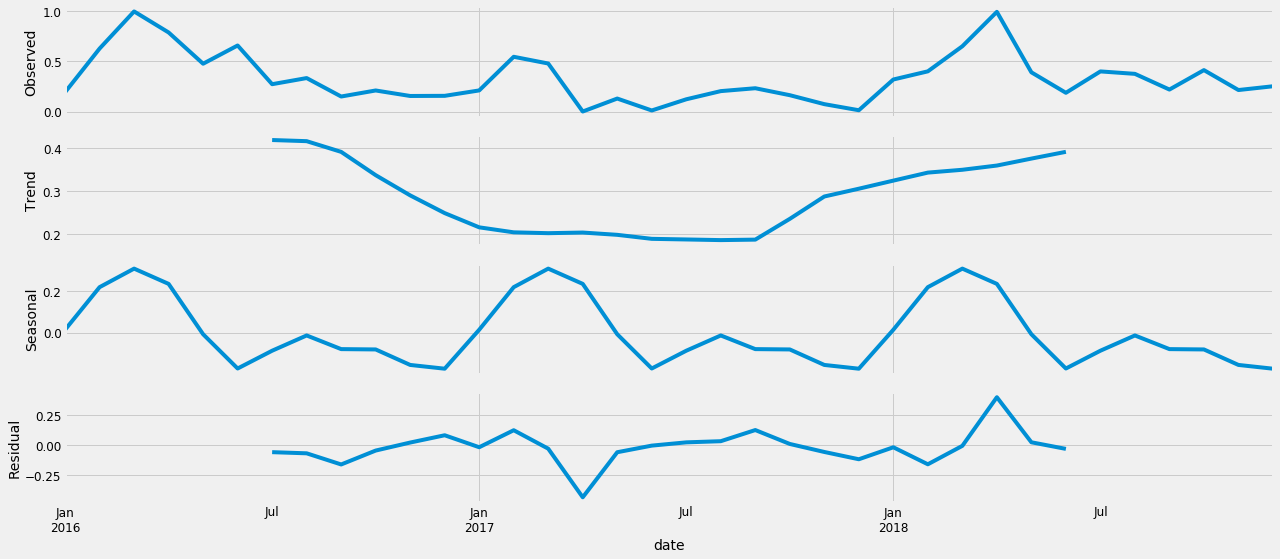

In [419]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [420]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1003      0.884     -0.113      0.910      -1.834       1.633
ma.L1         -1.0000   1.34e+04  -7.48e-05      1.000   -2.62e+04    2.62e+04
ar.S.L12      -0.6786      0.254     -2.671      0.008      -1.177      -0.181
sigma2         0.0384    513.018   7.48e-05      1.000   -1005.459    1005.536


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

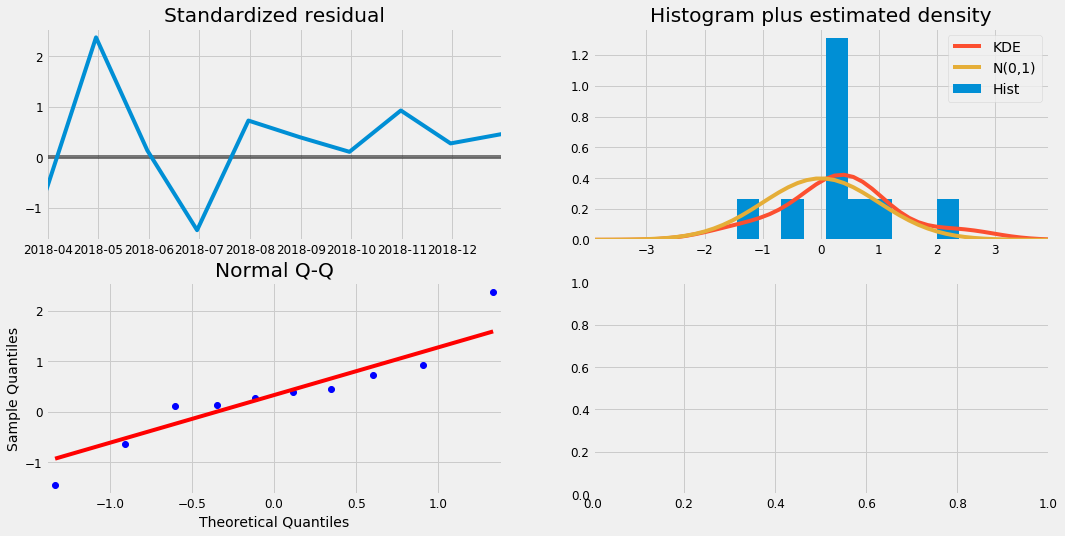

In [421]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=27, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [422]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1716.15


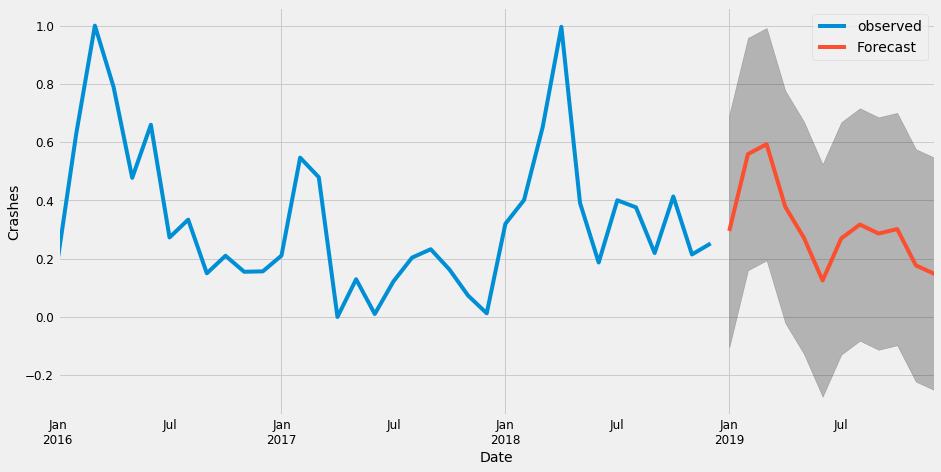

In [423]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crashes')
plt.legend()
plt.show()